## 0. Imports

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from pickle import dump


## 1. Data Collection

In [130]:
path = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(path)

data.to_csv("/workspace/unsupervised_learning_k_means/data/raw/housing.csv", index=False)


In [131]:
df = pd.read_csv("/workspace/unsupervised_learning_k_means/data/raw/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 2. Eliminating irrelevant columns

In [132]:
df = df[["MedInc", "Latitude", "Longitude"]]
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


## 3. Split train and test

In [133]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


## 4. Clustering (K-mean)

In [134]:
model_k_mean = KMeans(n_clusters=6, random_state=42)
model_k_mean.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [135]:
y_train = list(model_k_mean.labels_)
X_train["Cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


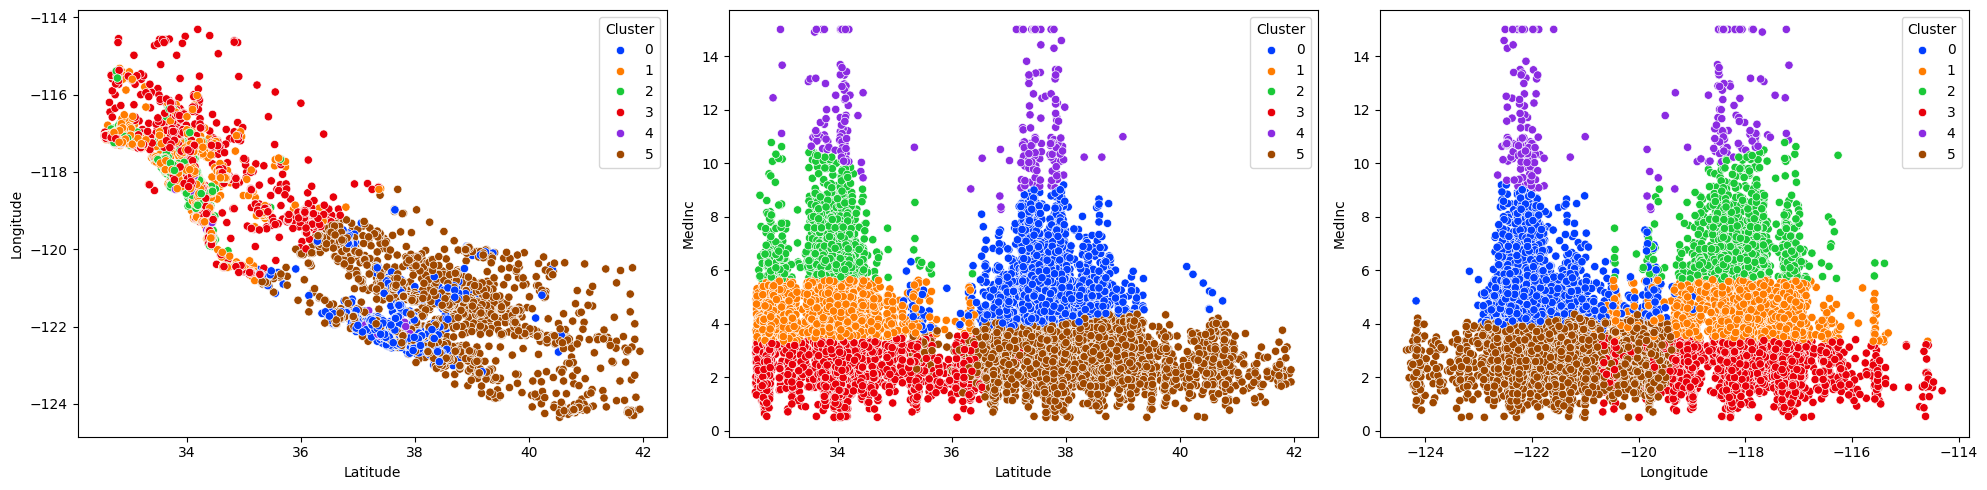

In [136]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

sns.scatterplot(ax = ax[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette="bright")
sns.scatterplot(ax = ax[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette="bright")
sns.scatterplot(ax = ax[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette="bright")

plt.tight_layout()
plt.show()

In [137]:
y_test = list(model_k_mean.predict(X_test))
X_test["Cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


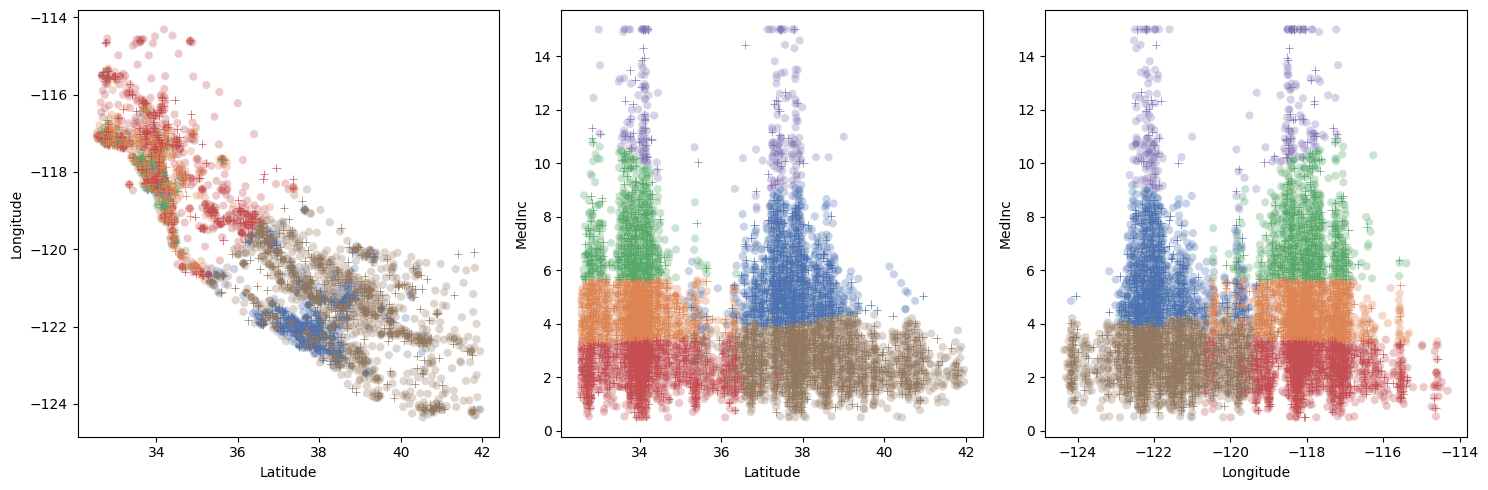

In [138]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

#TRAIN
sns.scatterplot(ax = ax[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette="deep", alpha=0.3)
sns.scatterplot(ax = ax[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette="deep", alpha=0.3)
sns.scatterplot(ax = ax[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette="deep", alpha=0.3)

#TEST
sns.scatterplot(ax = ax[0], data = X_test, x = "Latitude", y= "Longitude", hue = "Cluster", palette="deep", marker="+")
sns.scatterplot(ax = ax[1], data = X_test, x = "Latitude", y= "MedInc", hue = "Cluster", palette="deep", marker="+")
sns.scatterplot(ax = ax[2], data = X_test, x = "Longitude", y= "MedInc", hue = "Cluster", palette="deep", marker="+")

[ax[i].legend().remove() for i in range(3)]
plt.tight_layout()
plt.show()

## 5. Decision Tree

In [139]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

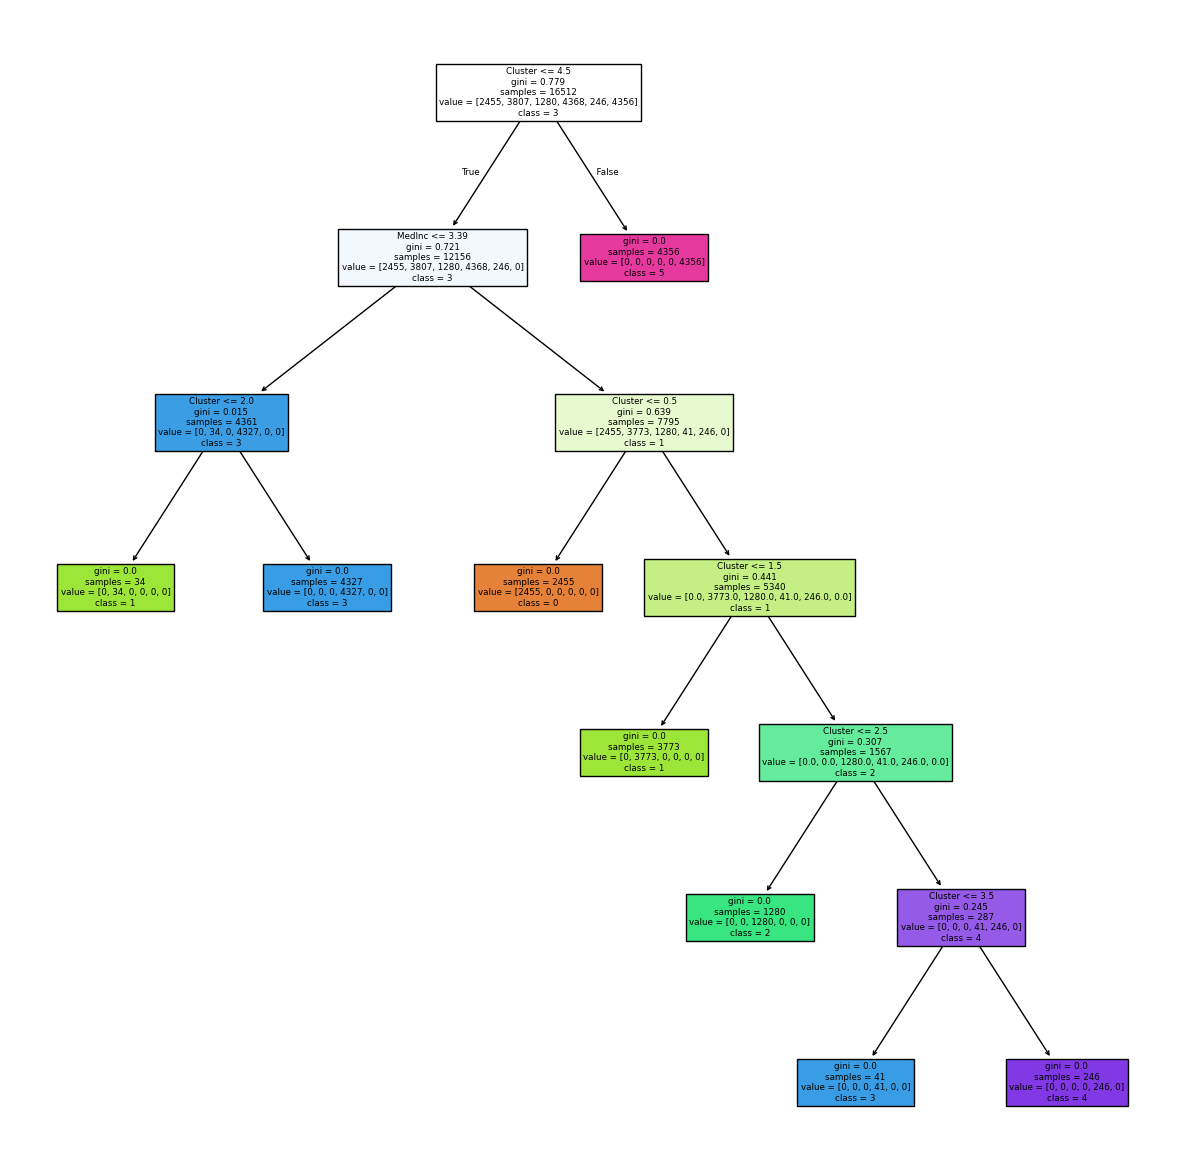

In [140]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [141]:
y_pred = model_tree.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [142]:
accuracy_score(y_test, y_pred)

1.0

# 6. Saving Models

In [143]:
dump(model_k_mean, open("/workspace/unsupervised_learning_k_means/models/k-means_default_42.sav", "wb"))
dump(model_tree, open("/workspace/unsupervised_learning_k_means/models/decision_tree_classifier_default_42.sav", "wb"))